<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-&amp;-Functions" data-toc-modified-id="Import-Libraries-&amp;-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries &amp; Functions</a></span></li><li><span><a href="#Read-the-Files" data-toc-modified-id="Read-the-Files-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the Files</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#Regression-Model" data-toc-modified-id="Regression-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Regression Model</a></span><ul class="toc-item"><li><span><a href="#XGBoost-Regressor" data-toc-modified-id="XGBoost-Regressor-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>XGBoost Regressor</a></span><ul class="toc-item"><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>GridSearch</a></span></li><li><span><a href="#Fit-to-Whole-Training-Data" data-toc-modified-id="Fit-to-Whole-Training-Data-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Fit to Whole Training Data</a></span></li><li><span><a href="#Performance-or-Classification" data-toc-modified-id="Performance-or-Classification-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Performance or Classification</a></span></li></ul></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Support-Vector-Regressor" data-toc-modified-id="Support-Vector-Regressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Support Vector Regressor</a></span></li></ul></li><li><span><a href="#Archive-Code" data-toc-modified-id="Archive-Code-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Archive Code</a></span></li></ul></div>

# Import Libraries & Functions

In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

from sklearn.metrics import accuracy_score

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import pandas as pd

In [32]:
def grade_calculation(score):
    score = score / 100
    
    if score <= 0.250000:
        val = 'D'
    elif score <= 0.500000: 
        val = 'C'
    elif score <= 0.750000: 
        val = 'B'
    elif score > 0.75: 
        val = 'A'

    return val

# Read the Files

In [30]:
train_1 = pd.read_csv('../data/ML_Data/train_footsie_contains.csv')
train_2 = pd.read_csv('../data/ML_Data/train_fortune100_contains.csv')
train_3 = pd.read_csv('../data/ML_Data/train_DAX_contains.csv')

train_df = pd.concat([train_1,train_2,train_3], axis=0)

In [33]:
train_df['ESG Controversies Score Simple'] = train_df['ESG Controversies Score'].apply(lambda x: grade_calculation(x))

In [34]:
train_df['ESG Controversies Score Simple'].unique()

array(['A', 'B', 'D', 'C'], dtype=object)

In [35]:
train_df = train_df.drop(['firm','year','ESG Controversies Score Grade','ESG Controversies Score Simple'], axis=1).reset_index(drop=True)

In [37]:
y = train_df.iloc[:,-1]
X = train_df.iloc[:,:-1]

# Principal Component Analysis

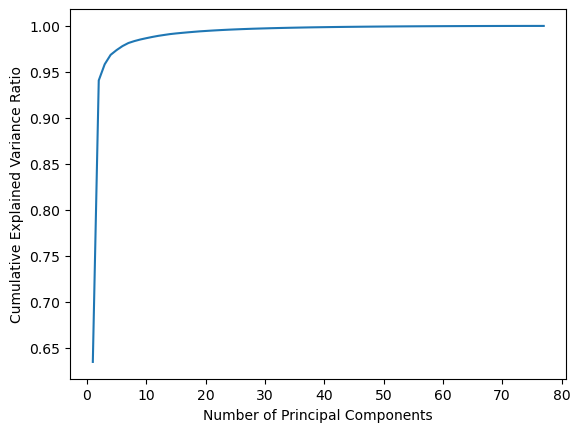

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fit PCA to Xtrn_mn
pca = PCA()

pca.fit(X)

# Calculate explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_exp_var_ratio = np.cumsum(explained_var_ratio)

# Plot the graph
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_exp_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

In [39]:
#(3) Your code goes here

# Calculate the cumulative explained variance ratio
cumulative_explained_var_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of principal components required to explain a certain percentage of the total variance
for percent in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
    num_components = np.argmax(cumulative_explained_var_ratio >= percent) + 1
    print(f"Minimum number of principal components to explain {percent*100}% of variance: {num_components}")

Minimum number of principal components to explain 50.0% of variance: 1
Minimum number of principal components to explain 60.0% of variance: 1
Minimum number of principal components to explain 70.0% of variance: 2
Minimum number of principal components to explain 80.0% of variance: 2
Minimum number of principal components to explain 90.0% of variance: 2
Minimum number of principal components to explain 95.0% of variance: 3
Minimum number of principal components to explain 99.0% of variance: 13


In [40]:
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.15, random_state=12)

# Regression Model

## XGBoost Regressor

In [62]:
# Create an XGBoostRegressor model
XGB_model = XGBRegressor()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the ensemble
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of each tree
}

### GridSearch

In [63]:
grid_search = GridSearchCV(XGB_model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Root Mean Squared Error: 32.35878474854929


### Fit to Whole Training Data

In [67]:
XGB_model = XGBRegressor(**grid_search.best_params_)
XGB_model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [68]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

### Performance or Classification

In [69]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.5
['B', 'A', 'C', 'B', 'B', 'C', 'B', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'B', 'D', 'B', 'A', 'A', 'A', 'A', 'A', 'C', 'A']


## Random Forest Regressor

In [72]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for grid search
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 3, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
}

In [73]:
grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Root Mean Squared Error: 30.763717619916108


In [74]:
rf_model = RandomForestRegressor(**grid_search.best_params_)
rf_model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [75]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

In [76]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.5
['B', 'A', 'C', 'B', 'B', 'C', 'B', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'B', 'D', 'B', 'A', 'A', 'A', 'A', 'A', 'C', 'A']


## Support Vector Regressor

In [78]:
# Support Vector Regressor
svr_model = SVR()

# Define the parameter grid for grid search
svr_param_grid = {
    'C': [0.1, 1, 10, 100],  # Penalty parameter C
    'epsilon': [0.01, 0.1, 0.5, 1.0],  # Epsilon parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf' and 'poly' kernels
}

In [79]:
grid_search = GridSearchCV(svr_model, svr_param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'C': 100, 'epsilon': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
Root Mean Squared Error: 34.06233962438234


In [80]:
svr_model = SVR(**grid_search.best_params_)
svr_model.fit(X_train, y_train)

y_pred = model.predict(X_val)

In [81]:
y_pred_grade = [grade_calculation(sc) for sc in y_pred]
y_val_grade = [grade_calculation(sc) for sc in y_val]

In [82]:
print(accuracy_score(y_pred_grade, y_val_grade))
print(y_pred_grade)
print(y_val_grade)

0.5
['B', 'A', 'C', 'B', 'B', 'C', 'B', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'B', 'D', 'B', 'A', 'A', 'A', 'A', 'A', 'C', 'A']


# Archive Code

In [211]:
grid_search = GridSearchCV(model, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the best hyperparameters and evaluation metric
print("Best Hyperparameters:", grid_search.best_params_)
print("Root Mean Squared Error:", rmse)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Root Mean Squared Error: 22.841653795025273
